# Maven Project, Video Games Analysis

Data set provided by Maven Analytics [video game sales](https://mavenanalytics.io/data-playground/video-game-sales)

## Author: M R Shaheedullah, GitHub Copilot off

### 1 Prepare system and import data

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# import csv
df=pd.read_csv(r"C:\Users\conif\Documents\Projects\Maven\GUIDED-Video-Games\Video+Game+Sales\vgchartz-2024.csv")

### 2 View CSV data sample and metadata

In [4]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


## 3 Exploratory Data Analysis

### 3.1 Find top 10 games by sales

In [6]:
# find top 10 games by sales
top_10 = df.sort_values('total_sales',ascending=False).reset_index().head(10)
top_10


,index,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


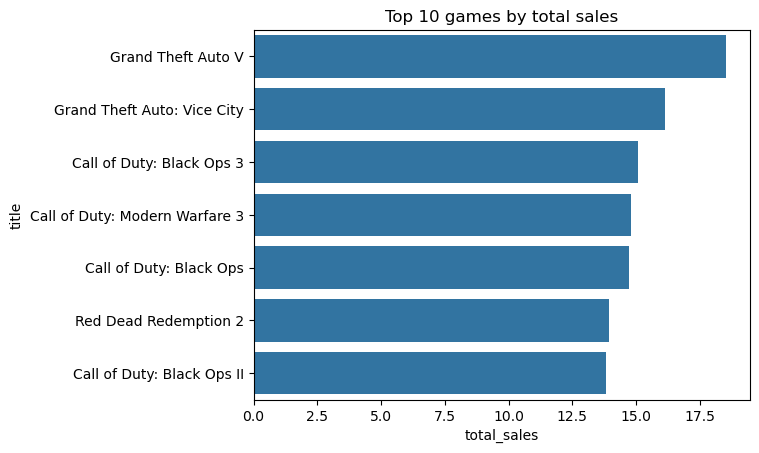

In [ ]:
# draw chart for top 10 games
chart = sns.barplot(x=top_10['total_sales'], y=top_10['title'], errorbar=None).set(title='Top 10 games by total sales')

### 3.2 Find most popular genres for each console

In [9]:
# find sales for genres per console
console_by_genre = df.groupby(['console','genre'])['total_sales'].sum().reset_index()

In [10]:
list(console_by_genre)

['console', 'genre', 'total_sales']

In [11]:
# sort by console alphabetically and total sales descending
console_by_genre = console_by_genre.sort_values(['console', 'total_sales'],ascending=[True, False])

In [12]:
console_by_genre

,console,genre,total_sales
0,2600,Action,29.14
8,2600,Shooter,22.96
4,2600,Platform,8.77
5,2600,Puzzle,6.42
10,2600,Sports,3.43
...,...,...,...
881,iQue,Puzzle,0.00
882,iQue,Racing,0.00
883,iQue,Role-Playing,0.00
884,iQue,Shooter,0.00


In [13]:
# as there are many consoles, find top 10 consoles by sales
top_10_consoles = df.groupby('console')['total_sales'].sum().reset_index()

In [14]:
top_10_consoles = top_10_consoles.sort_values(['total_sales'], ascending=False).head(10)

In [15]:
top_10_consoles

,console,total_sales
53,PS2,1027.76
73,X360,859.79
54,PS3,839.70
52,PS,546.25
55,PS4,539.92
70,Wii,459.44
22,DS,458.17
76,XOne,268.96
58,PSP,245.29
74,XB,232.05


In [16]:
# create a list of the top 10 consoles so we can filter later
top_10_consoles_list = top_10_consoles['console'].to_list()

In [17]:
top_10_consoles_list

['PS2', 'X360', 'PS3', 'PS', 'PS4', 'Wii', 'DS', 'XOne', 'PSP', 'XB']

In [18]:
# filter the console_by_genre dataframe for the top 10 consoles only
console_by_genre = console_by_genre.query('console in @top_10_consoles_list')

In [19]:
# we now have console by genre for the top 10 consoles
console_by_genre

,console,genre,total_sales
186,DS,Simulation,89.04
179,DS,Misc,68.79
175,DS,Action,65.25
177,DS,Adventure,64.27
182,DS,Puzzle,40.22
...,...,...,...
831,XOne,Party,0.05
841,XOne,Visual Novel,0.02
825,XOne,Board Game,0.00
826,XOne,Education,0.00


In [20]:
# use plotly express to plot a stacked bar chart of consoles with each genre
fig = px.bar(console_by_genre, x='console', y='total_sales', color='genre', title='console by genre')
fig.show()